In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('movies.csv') #csv file

In [3]:
data.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [4]:
data.shape

(979, 6)

There are 979 records and 6 columns.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


In [6]:
data.isnull().sum()   

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

<AxesSubplot:>

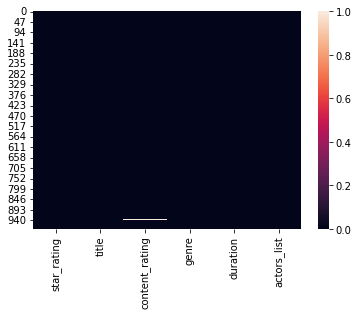

In [7]:
sns.heatmap(data.isnull())    

Content rating has 3 Null values as per the Heat Map.

There is 1 Float, 1 Int and 4 Objects.

Content-rating-3 null value

There are 6 columns, 979 rows.

Movies IMDB data related.


In [8]:
data.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [9]:
data[data['duration']>=180]['title']

2                             The Godfather: Part II
7      The Lord of the Rings: The Return of the King
8                                   Schindler's List
17                                     Seven Samurai
40                                    The Green Mile
78                       Once Upon a Time in America
85                                Lawrence of Arabia
89                                            Swades
93                       Dilwale Dulhania Le Jayenge
109                                   Dil Chahta Hai
132                            Judgment at Nuremberg
142                Lagaan: Once Upon a Time in India
143                          The Wolf of Wall Street
157                               Gone with the Wind
166                                  The Deer Hunter
184                              Fanny and Alexander
204                                          Ben-Hur
220                                           Gandhi
245                                     Barry 

These are the Movies with the duration time equal to or more than 180 minutes.

In [10]:
data.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [11]:
data.groupby('genre')['duration'].mean().sort_values()

genre
History       66.000000
Animation     96.596774
Film-Noir     97.333333
Horror       102.517241
Family       107.500000
Comedy       107.602564
Sci-Fi       109.000000
Fantasy      112.000000
Thriller     114.200000
Mystery      115.625000
Crime        122.298387
Action       126.485294
Drama        126.539568
Biography    131.844156
Adventure    134.840000
Western      136.666667
Name: duration, dtype: float64

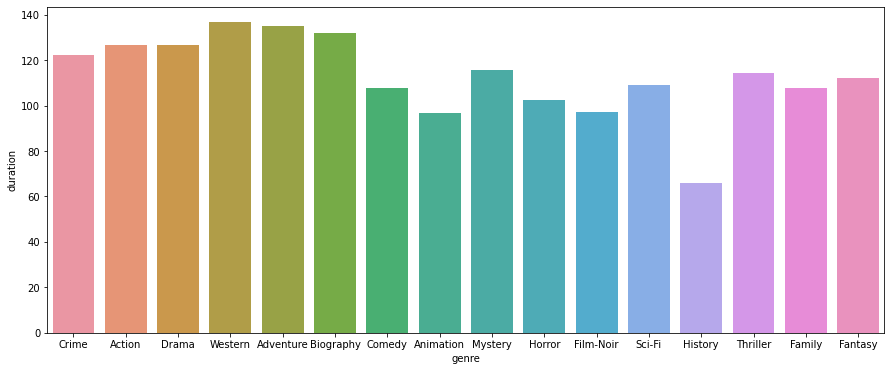

In [12]:
plt.figure(figsize=(15,6))
sns.barplot(x='genre',y= 'duration', data=data, ci=None)
plt.show()

Western Genre has the Highest Duration of 137 Minutes.

History Genre has the Lowest Duration of 66 Minutes.

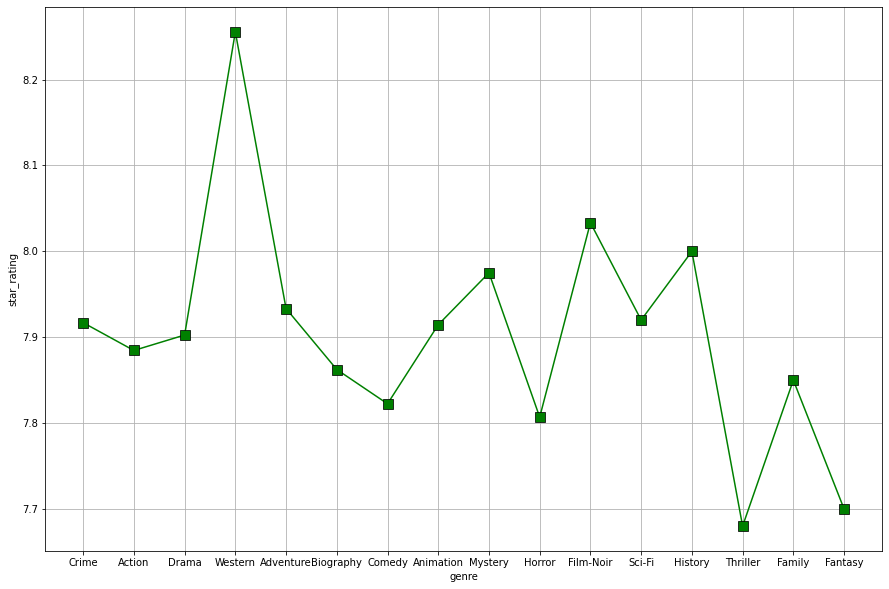

In [13]:
plt.figure(figsize=(15,10))
sns.lineplot(y='star_rating',x='genre', marker='s', mec="k", ms="10", color="g",data=data,ci=None)
plt.grid(True)
plt.show()

In [14]:
data.groupby('genre')['star_rating'].mean().sort_values()

genre
Thriller     7.680000
Fantasy      7.700000
Horror       7.806897
Comedy       7.822436
Family       7.850000
Biography    7.862338
Action       7.884559
Drama        7.902518
Animation    7.914516
Crime        7.916935
Sci-Fi       7.920000
Adventure    7.933333
Mystery      7.975000
History      8.000000
Film-Noir    8.033333
Western      8.255556
Name: star_rating, dtype: float64

Analysis of Rating genre wise

Western Genre has the Highest star rating of 8.26

Thriller Genre has the Lowest star rating of 7.68

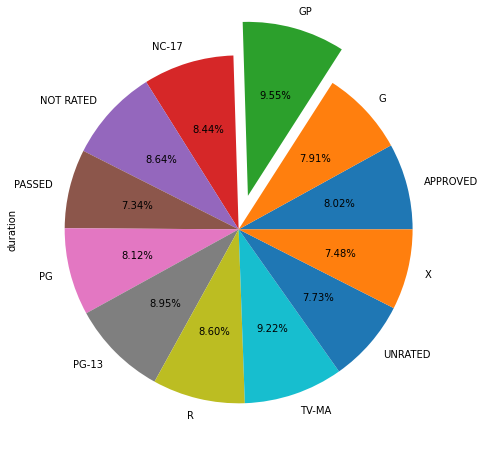

In [15]:
expl=[0,0,0.2,0,0,0,0,0,0,0,0,0]
#data.groupby('content_rating')['star_rating'].mean().plot(figsize=(15,8),kind='pie',autopct='%.2f%%',explode=expl) 
data.groupby('content_rating')['duration'].mean().plot(figsize=(15,8),kind='pie',autopct='%.2f%%',explode=expl) 
plt.show()

GP has the highest duration of 9.55%

In [16]:
top_10=data.nlargest(10,'duration')[['title','duration']].set_index('title')
top_10

,duration
title,
Hamlet,242
Gone with the Wind,238
Once Upon a Time in America,229
Lagaan: Once Upon a Time in India,224
The Ten Commandments,220
Lawrence of Arabia,216
Ben-Hur,212
Seven Samurai,207
"It's a Mad, Mad, Mad, Mad World",205


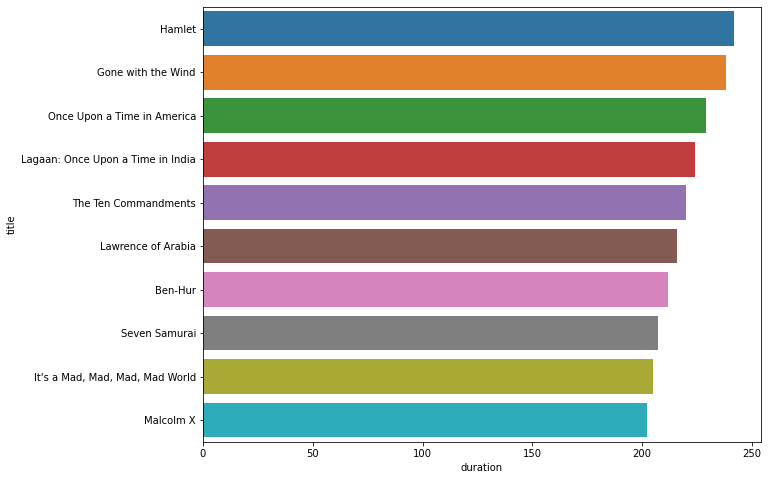

In [17]:
plt.figure(figsize=(10,8))
sns.barplot(x='duration', y=top_10.index, data= top_10)
plt.show()

Hamlet is the Movie with highest duration of 242 Minutes.